Code for Variance Hammer's Review of the new Doom of Mymeara Wraithknights
=======
This code is for the analysis of the new Inferno Lance armed Skathach Waithknight versus it's normal Craftworld cousin. The text of the review itself is at: http://www.variancehammer.com/ . Note that because this analysis uses random numbers, any results you obtain may differ from those on the blog posting due to random chance.

**Import the necessary libraries**

These are easily obtained using the Anaconda Python Distribution, which is available free from http://www.continuum.io

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import random as rand
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

As there is no Variance Hammer library available (yet), we need to define a couple useful functions. *DiceRoller()* is a function to roll an arbitrary number of d6 dice. *Shooting()* does what it says on the tin - it takes a number of shots, rolls the appropriate number of d6 dice, checks those results against Ballistic Skill, and if the shots are twin-linked, rerolls as appropriate. Note that at the moment this function **does not** work for BS values above 6.

In [4]:
def DiceRoller(n_rolls):
	try:
		dice = int(n_rolls)
	except ValueError:
		print("Number of dice to roll needs to be an integer")
	rolls = np.random.random_integers(6, size=(1.,dice))
	return rolls

In [27]:
def Shooting(BS, n_shots, twinlinked):
    try:
        BS = int(BS)
    except ValueError:
        print("BS needs to be an integer")
    try:
        n_shots = int(n_shots)
    except ValueError:
        print("Number of shots needs to be an integer")
    if twinlinked == "Y":
        shots = DiceRoller(n_shots)
        shots[shots <= (7-BS)] = rand.randint(1,6)
    elif twinlinked =="N":
        shots = DiceRoller(n_shots)
    else:
        print("Designate Twin-linking with Y or N. Assumed to be off.")
        shots = DiceRoller(n_shots)

    hits = np.sum(shots.__ge__(7-BS))
    return shots,hits

In [6]:
def Wounding(strength,toughness,save,n_hits,woundspermodel,auto):
    try:
        toughness = int(toughness)
    except ValueError:
        print("Target toughness needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    elif strength == "D-1":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")

    woundrolls = DiceRoller(n_hits)
    
    if auto == 0:
        if strength == "D":
            NoSaveD = np.sum(woundrolls==6)
            SaveD = np.sum(1<woundrolls) - NoSaveD
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            for j in range(NoSaveD):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,(rand.randint(1,6)+6))
            finalwounds = unsaved_expanded
        elif strength == "D-1":
            SaveD = np.sum(2<woundrolls)
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            finalwounds = unsaved_expanded
        
        else:
            SvTDiff = strength-toughness
            ToWound = max(2,4-SvTDiff)
            wounds = np.sum(woundrolls.__ge__(ToWound))
            saverolls = DiceRoller(wounds)
            unsaved = np.sum(saverolls<(save))
            finalwounds = unsaved
            
    else:
        if strength == "D":
            NoSaveD = np.sum(woundrolls==6)
            SaveD = np.sum(1<woundrolls) - NoSaveD
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            for j in range(NoSaveD):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,(rand.randint(1,6)+6))
            finalwounds = unsaved_expanded
        elif strength == "D-1":
            SaveD = np.sum(2<woundrolls)
            saverolls = DiceRoller(SaveD)
            unsaved = np.sum(saverolls<save)
            unsaved_expanded = 0
            for k in range(unsaved):
                unsaved_expanded = unsaved_expanded + min(woundspermodel,rand.randint(1,3))
            finalwounds = unsaved_expanded
        
        else:
            SvTDiff = strength-toughness
            autowounds = np.sum(woundrolls>=auto)
            ToWound = max(2,4-SvTDiff)
            wounds = np.sum(woundrolls.__ge__(ToWound))
            if ToWound > 6:
                truewounds = autowounds
            else:
                truewounds = wounds
            saverolls = DiceRoller(truewounds)
            unsaved = np.sum(saverolls<(save))
            finalwounds = unsaved
    
    cappedwounds = min(woundspermodel,finalwounds)
    return cappedwounds

def ArmorPen(strength,AV,save,n_hits,hullpoints,melta):
    try:
        AV = int(AV)
    except ValueError:
        print("Target Armor Value needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    elif strength == "D-1":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")
    
    if strength == "D":
        penrolls = DiceRoller(n_hits)
        NoSaveD = np.sum(penrolls==6)
        SaveD = np.sum(1<penrolls) - NoSaveD
        saverolls = DiceRoller(SaveD)
        unsaved = np.sum(saverolls<save)
        unsaved_expanded = 0
        for k in range(unsaved):
            unsaved_expanded = unsaved_expanded + min(hullpoints,rand.randint(1,3))
        for j in range(NoSaveD):
            unsaved_expanded = unsaved_expanded + min(hullpoints,(rand.randint(1,6)+6))
        final = min(hullpoints,unsaved_expanded)
    elif strength == "D-1":
        penrolls = DiceRoller(n_hits)-1
        NoSaveD = np.sum(penrolls==6)
        SaveD = np.sum(1<penrolls) - NoSaveD
        saverolls = DiceRoller(SaveD)
        unsaved = np.sum(saverolls<save)
        unsaved_expanded = 0
        for k in range(unsaved):
            unsaved_expanded = unsaved_expanded + min(hullpoints,rand.randint(1,3))
        for j in range(NoSaveD):
            unsaved_expanded = unsaved_expanded + min(hullpoints,(rand.randint(1,6)+6))
        final = min(hullpoints,unsaved_expanded)
    else:
        if melta == "Yes":
            penrolls = DiceRoller(n_hits) + DiceRoller(n_hits) + strength
            pen_and_glance = np.sum(penrolls.__ge__(AV))
            glances = np.sum(penrolls==AV)
            pens = pen_and_glance - glances
            saverolls = DiceRoller(pen_and_glance)
            unsaved = np.sum(saverolls<(save))
            final = min(hullpoints,unsaved)
        else:
            penrolls = DiceRoller(n_hits) + strength
            pen_and_glance = np.sum(penrolls.__ge__(AV))
            glances = np.sum(penrolls==AV)
            pens = pen_and_glance - glances
            saverolls = DiceRoller(pen_and_glance)
            unsaved = np.sum(saverolls<(save))
            final = min(hullpoints,unsaved)
    return final

In [7]:
def ConWraith(AV,enemySave,HP):
    Shots = Shooting(4,2,'N')[1]
    DGorP = ArmorPen("D",AV,enemySave,Shots,HP,melta="No")
    return DGorP

def NewWraith(AV,enemySave,HP):
    number_of_shots = (rand.randint(1,3) + 2) + (rand.randint(1,3) + 2)
    Shots = Shooting(4,number_of_shots,'N')[1]
    GorP = ArmorPen(8,AV,enemySave,Shots,HP,melta="Yes")
    return GorP

def NewWraithLong(AV,enemySave,HP):
    number_of_shots = (rand.randint(1,3) + 2) + (rand.randint(1,3) + 2)
    Shots = Shooting(4,number_of_shots,'N')[1]
    GorP = ArmorPen(8,AV,enemySave,Shots,HP,melta="No")
    return GorP

In [8]:
NewWraith(13,4,6)

2

In [9]:
runs = 1000

**Versus a Generic Knight**

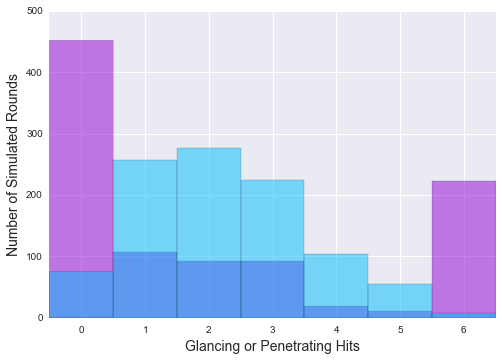

In [10]:
Knights = np.empty([runs,2])

for f in range(runs):
    Knights[f][0] = ConWraith(13,4,6)
    Knights[f][1] = NewWraith(13,4,6)

plt.xlim(xmax=6.5,xmin=-0.5)
plt.hist(Knights[:,0],alpha=0.50,color="DarkViolet",bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.hist(Knights[:,1],alpha=0.50,color="DeepSkyBlue",bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.xlabel("Glancing or Penetrating Hits",size=14)
plt.ylabel("Number of Simulated Rounds",size=14)

In [11]:
np.mean(Knights[:,0])

2.0459999999999998

In [12]:
np.mean(Knights[:,1])

2.2229999999999999

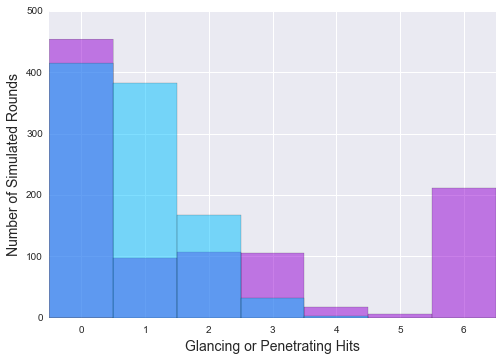

In [13]:
KnightsLong = np.empty([runs,2])

for f in range(runs):
    KnightsLong[f][0] = ConWraith(13,4,6)
    KnightsLong[f][1] = NewWraithLong(13,4,6)

plt.xlim(xmax=6.5,xmin=-0.5)
plt.hist(KnightsLong[:,0],alpha=0.50,color="DarkViolet",bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.hist(KnightsLong[:,1],alpha=0.50,color="DeepSkyBlue",bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.xlabel("Glancing or Penetrating Hits",size=14)
plt.ylabel("Number of Simulated Rounds",size=14)

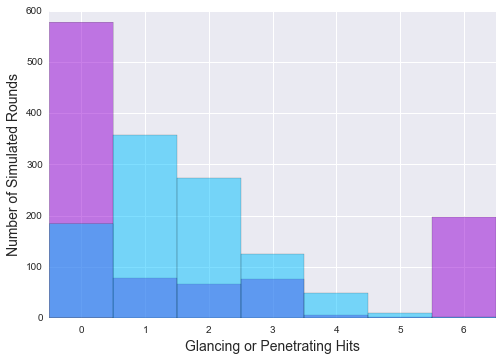

In [14]:
KnightsShield = np.empty([runs,2])

for f in range(runs):
    KnightsShield[f][0] = ConWraith(13,3,6)
    KnightsShield[f][1] = NewWraith(13,3,6)

plt.xlim(xmax=6.5,xmin=-0.5)
plt.hist(KnightsShield[:,0],alpha=0.50,color="DarkViolet",bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.hist(KnightsShield[:,1],alpha=0.50,color="DeepSkyBlue",bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.xlabel("Glancing or Penetrating Hits",size=14)
plt.ylabel("Number of Simulated Rounds",size=14)

** But What If We're Using the ITC Nerfed D? **

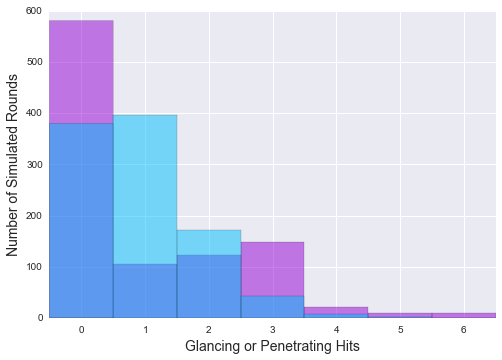

In [15]:
def NerfWraith(AV,enemySave,HP):
    Shots = Shooting(4,2,'N')[1]
    DGorP = ArmorPen("D-1",AV,enemySave,Shots,HP,melta="No")
    return DGorP

KnightsNerf = np.empty([runs,2])

for f in range(runs):
    KnightsNerf[f][0] = NerfWraith(13,4,6)
    KnightsNerf[f][1] = NewWraithLong(13,4,6)

plt.xlim(xmax=6.5,xmin=-0.5)
plt.hist(KnightsNerf[:,0],alpha=0.50,color="DarkViolet",bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.hist(KnightsNerf[:,1],alpha=0.50,color="DeepSkyBlue",bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.xlabel("Glancing or Penetrating Hits",size=14)
plt.ylabel("Number of Simulated Rounds",size=14)

**Versus a GMC that is *totally not a Wraithknight* **

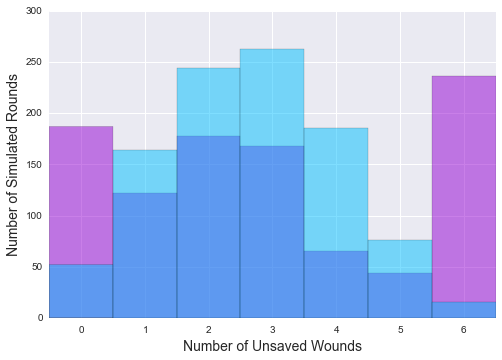

In [16]:
def MCConWraith(enemyT,enemySave,enemyW):
    Shots = Shooting(4,2,'N')[1]
    Wounds = Wounding("D",enemyT,enemySave,Shots,enemyW,auto=0)
    return Wounds

def MCNewWraith(enemyT,enemySave,enemyW):
    number_of_shots = (rand.randint(1,3) + 2) + (rand.randint(1,3) + 2)
    Shots = Shooting(4,number_of_shots,'N')[1]
    Wounds = Wounding(8,enemyT,enemySave,Shots,enemyW,auto=0)
    return Wounds

VersusGMC = np.empty([runs,2])

for g in range(runs):
    VersusGMC[g][0] = MCConWraith(8,7,6)
    VersusGMC[g][1] = MCNewWraith(8,7,6)

plt.xlim(xmax=6.5,xmin=-0.5)
plt.hist(VersusGMC[:,0],alpha=0.50,color="DarkViolet",
         bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.hist(VersusGMC[:,1],alpha=0.50,color="DeepSkyBlue",
        bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.xlabel("Number of Unsaved Wounds",size=14)
plt.ylabel("Number of Simulated Rounds",size=14)

In [17]:
np.mean(VersusGMC[:,0])

2.8780000000000001

In [18]:
np.mean(VersusGMC[:,1])

2.6549999999999998

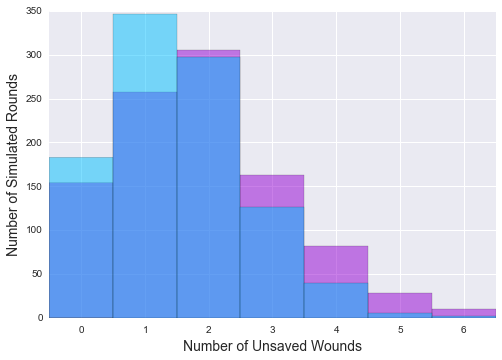

In [35]:
def ConWraithTL(AV,enemySave,HP):
    Shots = Shooting(4,2,'Y')[1]
    DGorP = ArmorPen("D",AV,enemySave,Shots,HP,melta="No")
    return DGorP

def NewWraithTL(AV,enemySave,HP):
    number_of_shots = (rand.randint(1,3) + 2) + (rand.randint(1,3) + 2)
    Shots = Shooting(4,number_of_shots,'Y')[1]
    GorP = ArmorPen(8,AV,enemySave,Shots,HP,melta="Yes")
    return GorP

Twinlink = np.empty([runs,2])

for f in range(runs):
    Twinlink[f][0] = NewWraithTL(13,3,6)
    Twinlink[f][1] = NewWraith(13,3,6)

plt.xlim(xmax=6.5,xmin=-0.5)
plt.hist(Twinlink[:,0],alpha=0.50,color="DarkViolet",
         bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.hist(Twinlink[:,1],alpha=0.50,color="DeepSkyBlue",
        bins =(-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5))
plt.xlabel("Number of Unsaved Wounds",size=14)
plt.ylabel("Number of Simulated Rounds",size=14)

In [36]:
np.mean(Twinlink[:,0])

1.885